### MATH2504 S2, 2022, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Isaac Beh

Student #1 ID: 45919260

Student #2 name: Leanna Salve

Student #2 ID: 47038156

GitHub repo: [Isaac-Beh__Leanna-Salve-2504-2022-BigHW](https://github.com/49Indium/Isaac-Beh__Leanna-Salve-2504-2022-BigHW)

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q13)

#### 13a:

A note to the marker: This question originally contained 3 methods of differentiation that we had to compare. The third method (the complex variable method) has been kept in as we felt it was annoying to delete something we spent time making.

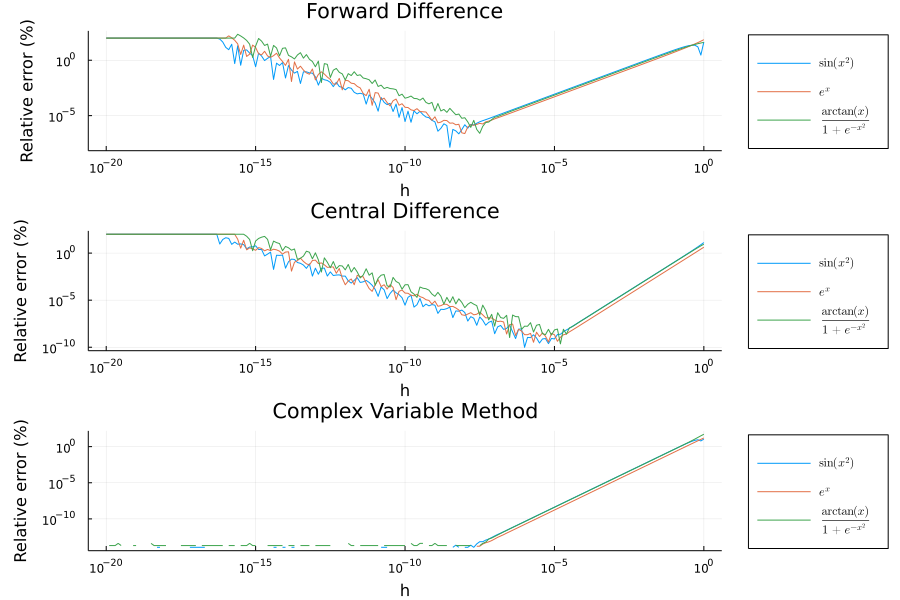

In [1]:
using Plots

# For nice looking legends
using LaTeXStrings

function my_appox_derivative(f, x, h; method::String)
    if lowercase(method) == "forward difference"
        return (f(x+h) - f(x))/h
    elseif lowercase(method) == "central difference"
        return (f(x + h/2) - f(x - h/2))/h
    elseif lowercase(method) == "complex variable method"
        return imag(f(x + h*im)/h)
    end
    throw(error("Unknown method: " * method))
end

function relative_error(experimental_value, actual_value)
    error = abs((experimental_value - actual_value) / actual_value) * 100
    return isfinite(log(error)) ? error : missing
end

f_1(x) = sin(x^2)
f_2(x) = exp(x)
f_3(x) = atan(x) / (1 + exp(-x^2))

f = [f_1, f_2, f_3]
sub_value = [1/2, 1, 2]

actual_value = [x->cos(x^2) * 2x, x->exp(x), x->(exp(x^2) * (2(x^3 + x) * atan(x) + exp(x^2) + 1))/((exp(x^2) + 1)^2 * (x^2 + 1))]

hs = 10 .^ (0:-0.1:-20)

plots = Any[]

for method in ["Forward Difference", "Central Difference", "Complex Variable Method"]
    errors = Any[]
    for i in 1:3
        push!(errors, relative_error.(my_appox_derivative.(f[i], sub_value[i], hs, method=method), actual_value[i](sub_value[i])))
    end
    push!(plots, plot(hs, errors, xscale = :log10, yscale = :log10, xlabel="h", ylabel="Relative error (%)", label = [L"\sin(x^2)" L"e^x" L"\frac{\arctan(x)}{1+e^{-x^2}}"], legend = :outertopright, title = method))
end

# For left_margin size
using Plots.PlotMeasures

plot(plots..., layout = (3, 1), size=(900,600), left_margin = 20px)

The plots above show the relative error for each method. We can then see that the optimal `h` for the forward difference method is around $5\times10^{-7}$, the optimal `h` for the central difference method is about $10^{-5}$, and the optimal `h` for the central difference method is about $5\times10^{-7}$ but smaller values do not increase relative error.

#### 13b:

For this question, we will assume a "softmax evaluation" is the evaluation of only one component of the softmax function.

For the forward difference scheme, we need to compute $\frac{\partial}{\partial z_j}\frac{e^{z_i}}{\sum_{k=1}^Ke^{z_k}}$ for each $i,j\in\{1,\ldots,K\}$. This requires us to calculate $\frac{S(z+he_j)_i-S(z)_i}{h}$ where $e_j$ is the unit vector in the $j^\text{th}$ direction. Notice that $S(z)_i$ could be calcualted once for each $j$, so $K$ call is needed. $S(z+he_j)_i$ is unique to each $i$ and $j$, so $K^2$ calls of the softmax function is needed. Thus $K+K^2$ calls are requred.

If we instead use the central difference scheme, we must calculate $\frac{S\left(z+\frac{h}{2}e_j\right)_i-S\left(z-\frac{h}{2}e_j\right)_i}{h}$. Notice that both terms of the numerator are unique to each $i$ and $j$, so $K^2$ calls are needed for each term. Thus, $2K^2$ softmax evaluations are needed in total.

#### 13c:

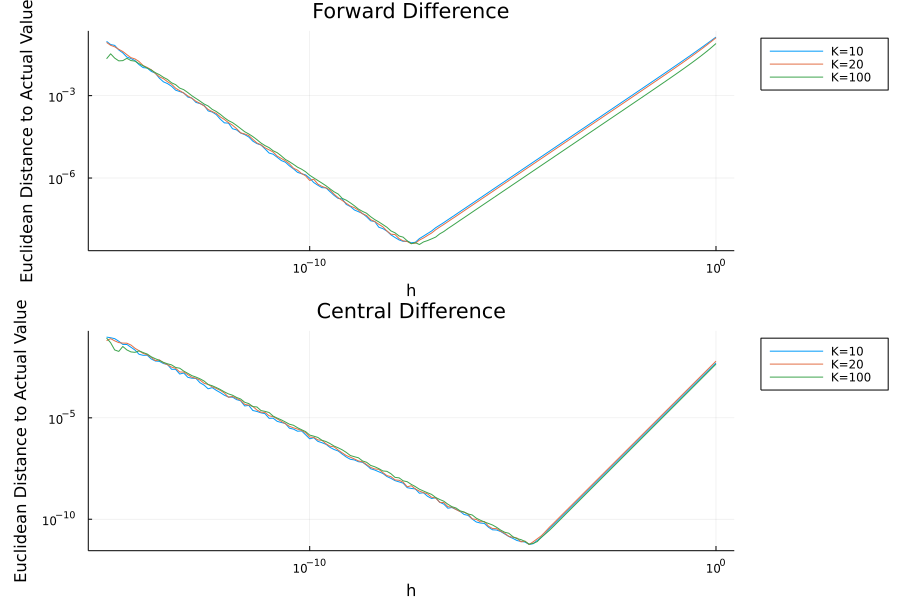

In [2]:
using Plots

# For nice looking legends
using LaTeXStrings

function my_appox_derivative(f, x, h; method::String)
    if lowercase(method) == "forward difference"
        return (f(x+h) - f(x))/sum(h)
    elseif lowercase(method) == "central difference"
        return (f(x + h./2) - f(x - h./2))/sum(h)
    end
    throw(error("Unknown method: " * method))
end

softmax_function(z, component) = exp(z[component]) / sum(exp.(z))

actual_jacobean_value(z,i,j) = i == j ? softmax_function(z,i) * (1 - softmax_function(z,i)) : - softmax_function(z,i) * softmax_function(z,j)

hs = 10 .^ (0:-0.1:-15)

plots = Any[]

using IterTools

for method in ["Forward Difference", "Central Difference"]
    errors = Array{Float64}(undef, length(hs), 3)
    for (K_index, K) in enumerate([10,20,100])
        z = (1:K) .^ (1/3)
        for (h_index, h) in enumerate(hs)
            actual_values = [actual_jacobean_value(z, i, j) for (i,j) in product(1:K, 1:K)]
            approximate_values = [my_appox_derivative((x)->(softmax_function(x,i)), z, [k==j for k in 1:K]*h, method=method) for (i,j) in product(1:K, 1:K)]
            errors[h_index, K_index] = sqrt(sum((actual_values - approximate_values) .^ 2))

        end
    end
    push!(plots, plot(hs, errors, xscale = :log10, yscale = :log10, xlabel="h", ylabel="Euclidean Distance to Actual Value", label = ["K=10" "K=20" "K=100"], legend = :outertopright, title = method))
end

# For left_margin size
using Plots.PlotMeasures

plot(plots..., layout = (2, 1), size=(900,600), left_margin = 20px)

We can see that the size of $z$ does not affect the optimal value of $h$ much. The method of deifferentiation, however, does. The forward difference method reaches its optimal step size at about $5\times10^{-7}$, whereas the optimal stepsize of the central difference method is just short of $10^{-5}$. We can also see that this method is more accurate (at optimal step sizes), getting within a distance of $10^{-10}$ of the actual value.

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q14)

In [3]:
# Code given in question sheet

using LinearAlgebra

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;

Note that two different implementations of the forth method are implemented below (namely `π_random` and `π_random_trialled`). The difference is that `π_random` only does one trial, whereas `π_random_trialled` takes the average of multiple trials.

In [4]:
function π_linear_equations(P)
    # Note 0 = π(I-P)
    n = size(P, 1)
    return vec(hcat(zeros(n)', 1) / hcat((I-P), ones(n)))
end

function π_limit(P; error = 10^-6, max = 10^4)
    P_prev = 0*P
    N = 1
    while any(abs.(P - P_prev) .> error) && N < max
        P_prev = P
        P *= P
        N += 1
    end
    return P[1, :]
end

function π_eigen_vector(P)
    eigen_values, eigen_vectors = eigen(P')
    unscaled_π = eigen_vectors[:, eigen_values .≈ 1]'
    return vec(unscaled_π ./ sum(unscaled_π))
end

using StatsBase

function π_random(P; error = 10^-6, max = 10^4)
    n = size(P, 1)
    position = 1
    total = zeros(n)
    total_prev = ones(n)
    
    N = 1
    while any(abs.(total./N - total_prev./(N-1)) .> error) && N < max
        total_prev = copy(total)
        position = wsample(1:n, P[position, :])
        N += 1
        
        total[position] += 1
    end
    
    return total ./ N
end

function π_random_trialled(P; error = 10^-6, max = 10^3, trials = 10^2)
    n = size(P, 1)
    stationary = zeros(n)
    
    for trial in 1:trials
        position = rand(1:n)
        total = zeros(n)
        total_prev = ones(n)

        N = 1
        while any(abs.(total./N - total_prev./(N-1)) .> error) && N < max
            total_prev = copy(total)
            position = wsample(1:n, P[position, :])
            N += 1

            total[position] += 1
        end
        
        stationary .+= total./N
    end
    
    return stationary ./ trials
end

@show structured_π(5)
@show π_linear_equations(structured_P(5))
@show π_limit(structured_P(5))
@show π_eigen_vector(structured_P(5))
@show π_random(structured_P(5))
@show π_random_trialled(structured_P(5));

structured_π(5) = [0.2786497527413459, 0.2322081272844549, 0.1935067727370457, 0.16125564394753808, 0.13437970328961507]
π_linear_equations(structured_P(5)) = [0.2786497527413455, 0.23220812728445478, 0.19350677273704606, 0.1612556439475384, 0.1343797032896154]
π_limit(structured_P(5)) = [0.27864975274177767, 0.23220812728465606, 0.1935067727369973, 0.16125564394728384, 0.1343797032892919]
π_eigen_vector(structured_P(5)) = [0.278649752741346, 0.2322081272844547, 0.19350677273704578, 0.16125564394753816, 0.13437970328961515]
π_random(structured_P(5)) = [0.2778, 0.2415, 0.1997, 0.1569, 0.124]
π_random_trialled(structured_P(5)) = [0.27486, 0.23029000000000008, 0.19355999999999995, 0.16319000000000003, 0.13710000000000003]


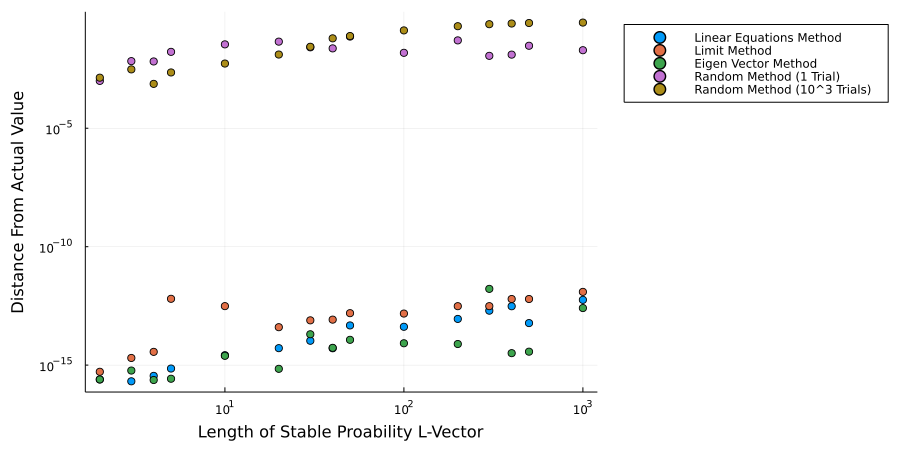

In [5]:
L_values = [2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000]
methods = [π_linear_equations, π_limit, π_eigen_vector, π_random, π_random_trialled]

distances = Array{Float64}(undef, (length(L_values), 5))

for (i, L) in enumerate(L_values)
    P = structured_P(L)
    actual_π = structured_π.(L)
    
    for (j, method) in enumerate(methods)
        distances[i, j] = norm(actual_π - method(P))
    end
end

using Plots
# For sizes of margins
using Plots.PlotMeasures

plot(L_values, distances,
    linetype=:scatter,
    xlabel = "Length of Stable Proability L-Vector",
    ylabel = "Distance From Actual Value",
    xscale = :log10,
    yscale = :log10,
    label=["Linear Equations Method" "Limit Method" "Eigen Vector Method" "Random Method (1 Trial)" "Random Method (10^3 Trials)"],
    legend = :outertopright,
    left_margin = 20px,
    bottom_margin = 20px,
    size = (900, 450))

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q15)

#### 15a:

In [6]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]
state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem. 
"""
function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

In [7]:
using Plots, Measures

function plot_solution( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))
    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")
    return p1, p4
end;

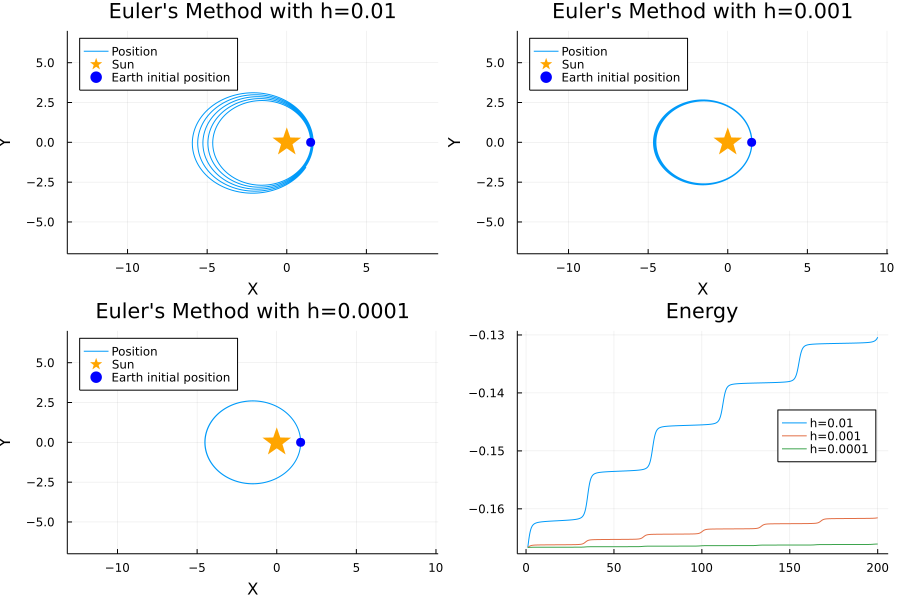

In [8]:
function eulers_method(rhs, t, initial::Vector{Float64})
    # Storage of state (position, velocity, etc...)
    # rows are each component of state space, colums go over time.
    state = Array{Float64}(undef, length(initial), length(t))
    state[:, 1] .= initial
    
    for (i, time) in enumerate(t[1:end-1])
        time_step = t[i+1] - time
        state[:, i+1] = state[:, i] + time_step*rhs(state[:, i], time)
    end
    
    return state, t
end

# Plotting stuff
function plot_sun_moon_system(solve_method, hs, max_time, initial_conditions, title)
    number_of_plot_points = 10000

    plots = Any[]
    times = Any[]
    energies = Any[]

    for h in hs
        state, time = solve_method(df_dt_one_body, 1:h:max_time, initial_conditions)

        push!(times, time)

        # plot only a subset of points for efficiency
        plot_indexes = floor.(Int, range(1, length(time), length = number_of_plot_points))

        p = plot(state[3, plot_indexes], state[4, plot_indexes], label = "Position", xlabel= "X", ylabel = "Y", title = title*" with h=$(h)", aspectratio=1, legend=:topleft, ylim=(-7,7))
        scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
        scatter!([state[3, 1]], [state[4, 1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")
        push!(plots, p)

        r = sqrt.(state[3, :].^2 + state[4, :].^2)
        push!(energies, 0.5*(state[1, :].^2 + state[2, :].^2) - 1.0./r)
    end

    energy_plot = plot()

    for i in 1:3
        # plot only a subset of points for efficiency
        plot_indexes = floor.(Int, range(1, length(times[i]), length = number_of_plot_points))
        plot!(times[i][plot_indexes], energies[i][plot_indexes], title = "Energy", label = "h=$(hs[i])", legend = :right)
    end

    plot(plots..., energy_plot, layout = (2, 2), size=(900,600))
end

plot_sun_moon_system(eulers_method, [0.01, 0.001, 0.0001], 200, [0, 1, 1.5, 0], "Euler's Method")

#### 15b:

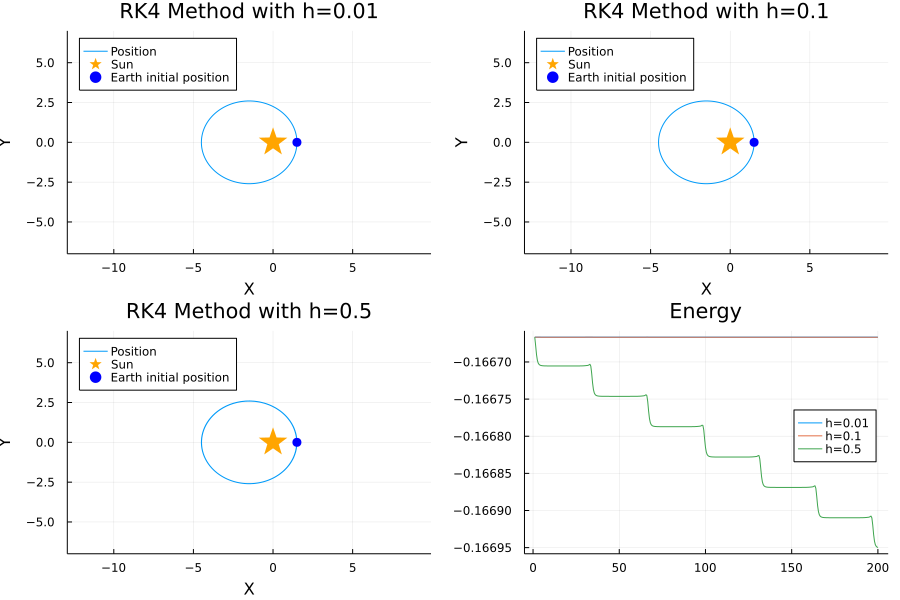

In [9]:
function ODE_solve_RK4(rhs, t, initial::Vector{Float64})
    # Storage of state (position, velocity, etc...)
    # rows are each component of state space, colums go over time.
    state = Array{Float64}(undef, length(initial), length(t))
    state[:, 1] .= initial
    
    for (i, time) in enumerate(t[1:end-1])
        # This is sometimes known as h
        time_step = t[i+1] - time
        
        k1 = rhs(state[:, i], time)
        k2 = rhs(state[:, i] + time_step * (k1/2), time)
        k3 = rhs(state[:, i] + time_step * (k2/2), time)
        k4 = rhs(state[:, i] + time_step * k3, time)
        
        state[:, i+1] = state[:, i] + (time_step/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    
    return state, t
end

plot_sun_moon_system(ODE_solve_RK4, [0.01, 0.1, 0.5], 200, [0, 1, 1.5, 0], "RK4 Method")

#### 15c:

Timing testing
Euler's method with h=0.01:   2.862 ms (99508 allocations: 9.72 MiB)
RK4 method with h=0.01:   13.088 ms (437808 allocations: 40.69 MiB)
Euler's method with h=0.1:   286.700 μs (9958 allocations: 995.41 KiB)
RK4 method with h=0.1:   1.273 ms (43788 allocations: 4.07 MiB)
Euler's method with h=0.5:   58.400 μs (1997 allocations: 199.48 KiB)
RK4 method with h=0.5:   254.400 μs (8763 allocations: 833.80 KiB)

Accuracy Testing
Euler's method with h=0.0001: 0.00028297330287901625
RK4 method with h=0.0001: 1.7792819995143816e-14
Euler's method with h=0.001: 0.0027444023809521942
RK4 method with h=0.001: 2.3648444313906225e-15
Euler's method with h=0.01: 0.021537208503322545
RK4 method with h=0.01: 2.836609996892392e-12
Euler's method with h=0.1: 0.08424127739692723
RK4 method with h=0.1: 6.506218009298959e-8
Euler's method with h=0.5: 0.17713799414569684
RK4 method with h=0.5: 0.00014145969376110523


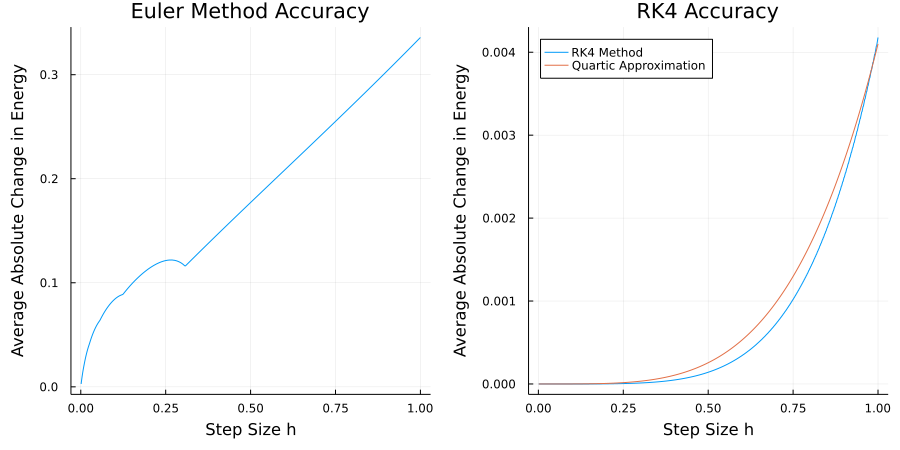

In [10]:
# This function may take long to run as @btime runs functions many times

using BenchmarkTools

# For sizes of margins
using Plots.PlotMeasures

function energy_difference(state)
    
    # check only a subset of points for efficiency
    # before this was implemented, this function took up half of the time
    indexes = floor.(Int, range(1, size(state, 2), length = 10000))

    r = sqrt.(state[3, indexes].^2 + state[4, indexes].^2)
    energy = 0.5*(state[1, indexes].^2 + state[2, indexes].^2) - 1.0./r
    return mean(abs.(energy[:] .- energy[begin]))
end
 
println("Timing testing")
for h in [0.01, 0.1, 0.5]
    print("Euler's method with h=$(h): ")
    @btime eulers_method($df_dt_one_body, 1:$h:200, [0, 1, 1.5, 0])
    print("RK4 method with h=$(h): ")
    @btime ODE_solve_RK4($df_dt_one_body, 1:$h:200, [0, 1, 1.5, 0])
end

println("\nAccuracy Testing")

for h in [0.0001, 0.001, 0.01, 0.1, 0.5]
    print("Euler's method with h=$(h): ")
    state, _ = eulers_method(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0])
    println("$(energy_difference(state))")
    print("RK4 method with h=$(h): ")
    state, _ = ODE_solve_RK4(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0])
    println("$(energy_difference(state))")
end

hs = 0.001:0.001:1

states = [(eulers_method(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0]))[1] for h in hs]
euler_plot = plot(hs, energy_difference.(states),
    xlabel = "Step Size h",
    ylabel = "Average Absolute Change in Energy",
    title = "Euler Method Accuracy",
    legend = :none)

states = [(ODE_solve_RK4(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0]))[1] for h in hs]
RK4_plot = plot(hs, energy_difference.(states),
    xlabel = "Step Size h",
    ylabel = "Average Absolute Change in Energy",
    title = "RK4 Accuracy",
    label = "RK4 Method",
    legend = :topleft)
plot!(hs, 0.0041*hs.^4, label = "Quartic Approximation")

plot(euler_plot, RK4_plot, layout = (1, 2), size = (900, 450),
    left_margin = 20px,
    bottom_margin = 20px)

We will first analyse the efficiency and accuracy of the methods individually. The Euler method can be seen to increase in speed proportionally to the increase in step size. This is reasonable, as the step size dictates the number of iterations of the main loop. The global error (measured by the aerage change in energy which should be linear) increases rapidly as the step size increases until a step size of approximately 0.3 is reached, where the error scales linearly with step size. It should be noted that this seems to not be linear for step sizes under 0.3.

To understand why, see the plot below. We can see for large enough step sizes, no stable orbit is reached. The Euler method is much more stable when the orbit is not close to the sun. When the step size is small, the number of revolutions changes, so there is much more variability. The bumps are caused by when additional revolutions are either formed or not.

The RK4 method also seems to have a run-time proportional to the step size, presumably for the same reason as the Euler method. The global error apprears to be quartic (see the plots above).

Comparitively, for the same step size, Euler's method is about 5 times faster than the RK4 method (likely as the RK4 method has 4 calls to the ODE function, where Eulers method only contains 1). However, the RK4 method is significantly more accurate. To match a RK4 implementation with a step size of 0.5, Euler's method requires a step size 5000 times smaller. Hence, for the same accuracy, Euler's method is roughly 1000 times slower than the RK4 method.

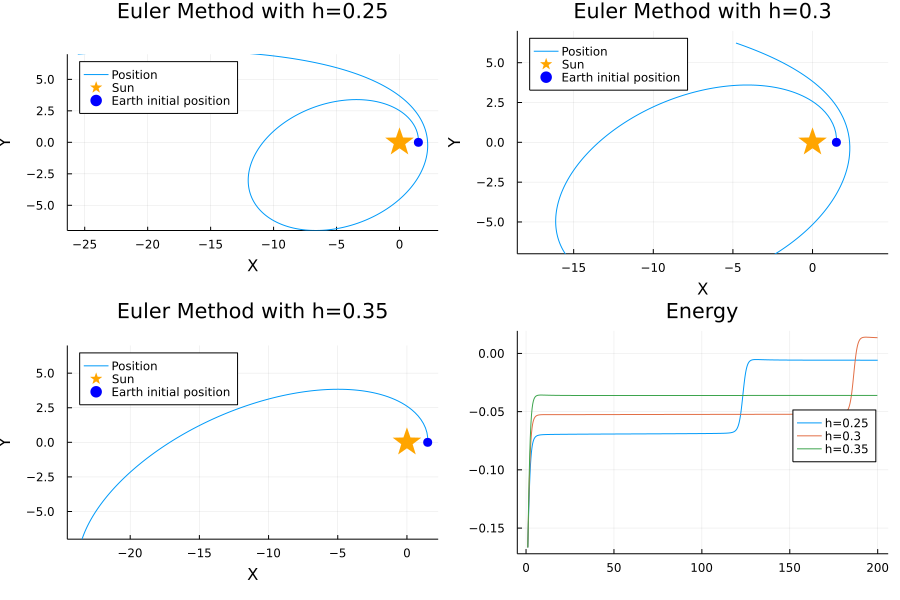

In [11]:
plot_sun_moon_system(eulers_method, [0.25, 0.3, 0.35], 200, [0, 1, 1.5, 0], "Euler Method")

#### 15d:

┌ Info: Saved animation to 
│   fn = c:\Users\isaac\Documents\Uni\MATH2504\Isaac-Beh__Leanna-Salve-2504-2022-BigHW\Notebooks\question_15d.gif
└ @ Plots C:\Users\isaac\.julia\packages\Plots\GGa6i\src\animation.jl:126


Plots.AnimatedGif("c:\\Users\\isaac\\Documents\\Uni\\MATH2504\\Isaac-Beh__Leanna-Salve-2504-2022-BigHW\\Notebooks\\question_15d.gif")
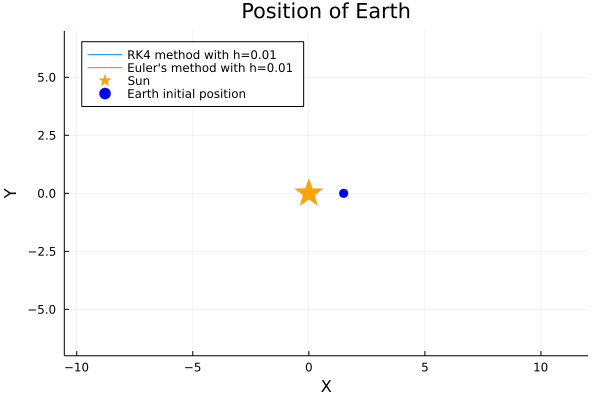

In [12]:
best_state, time = ODE_solve_RK4(df_dt_one_body, 1:0.01:200, [0, 1, 1.5, 0])
worst_state, time = eulers_method(df_dt_one_body, 1:0.01:200, [0, 1, 1.5, 0])
# Note that time will be the same in both cases

p = plot(2, # 2 different trajectories
    xlabel= "X",
    ylabel = "Y",
    title = "Position of Earth",
    aspectratio=1,
    legend=:topleft,
    ylim=(-7,7),
    label=["RK4 method with h=0.01" "Euler's method with h=0.01"])
scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
scatter!([best_state[3, 1]], [best_state[4, 1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

animation = @animate for i in 1:length(time)
    push!(p, 1, best_state[3, i], best_state[4, i])
    push!(p, 2, worst_state[3, i], worst_state[4, i])
end every 100
gif(animation, "question_15d.gif")

The file can also be found attached (named `question_15d.gif`).

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q16)

#### 16a:

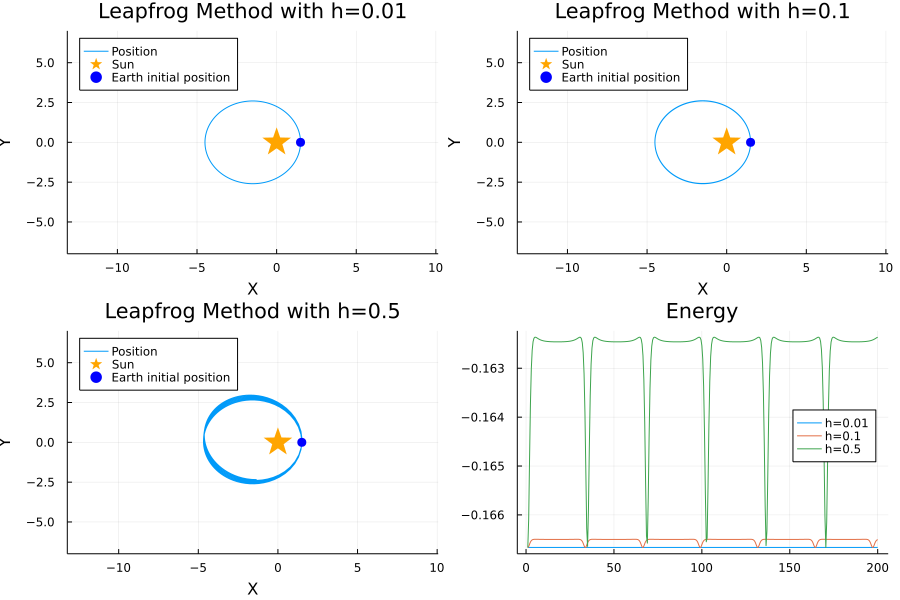

In [13]:
# Only works for second order systems of 2 dimension
function ODE_solve_leap_frog(rhs, t, initial::Vector{Float64})
    # Storage of state (position, velocity, etc...)
    # rows are each component of state space, colums go over time.
    state = Array{Float64}(undef, length(initial), length(t))
    state[:, 1] .= initial
    
    for (i, time) in enumerate(t[1:end-1])
        # This is sometimes known as h
        time_step = t[i+1] - time
        half_time_step = time_step/2
        
        v_half = state[1:2, i] + half_time_step * (rhs(state[:, i], time))[1:2]
        
        # Update position
        state[3:4, i+1] = state[3:4, i] + time_step * v_half
        # Update velocity
        state[1:2, i+1] = v_half + half_time_step * (rhs(vec(hcat(v_half, state[3:4, i+1])), time))[1:2]
    end
    
    return state, t
end

plot_sun_moon_system(ODE_solve_leap_frog, [0.01, 0.1, 0.5], 200, [0, 1, 1.5, 0], "Leapfrog Method")

#### 16b:

We assume that all float operations (for example `+`, `-`, `*`, `/`, `sqrt`, `^`) take the same amount of time. We also assume that applying an operation element-wise on a vector of length $n$ requires $n$ operations to occur.

We will first consider the number of operations required for each call of $f$ (which is labelled `df_dt_one_body` in the code above). Calculation of `r` requires 4 operations. The multiplication of `M` and `G` is of known values, so could be computed beforehand (by the compiler), so only 6 more operations are needed, leading to 10 float operations used in `df_dt_one_body`.

We will now consider Euler's method. 1 operation is needed for determining the timestep (but could be removed in other implementations if we knew the timestep was constant). 2 operations are used, but each of these act on all of the state, which is a vector of 4 floats, with $4\times2=8$ steps in total. We also call `df_dt_one_body` once per step. So $1+4*2+10=19$ float operations are used in each step.

Now, considering the RK4 method, 1 operation is needed for determining the timestep (again, this could be removed in other implementations if we knew the timestep was constant). The arguments for the calculation of `k_1`, `k_2`, `k_3` and `k_3` require 0, 6, 6 and 5 operations respectively. Each of these also require a call to `df_dt_one_body`, increasing the operation count per step by 40, leading to a current total of 58. The final state calculation uses 7 array operations, with each applied to a array of 4 elements, leading to $7\times4=28$ more operations. We also have to include the opperation to divide the timestep by 6. So there are $40+28+1=69$ operations per step.

For the second order leapfrog method, we again use an operation for determining the timestep (potentially not required, as per above), and another for finding half the timestep. To calculate `v_half`, 2 array operations are used, on only the first 2 elements of the array, leading to 4 more operations. We also call `df_dt_one_body` for 10 more operations, leading to a current total of $1+1+4+10=16$ operations. Updating the position applies 2 array operations on arrays of length 2, increasing the total to $16+2\times2=20$ operations. For updating the velocity, we again use 2 array operations on arrays of length 2, but also use a call of `df_dt_one_body`, leading to $20+2\times2+10=34$ operations required per step.

We can now compare these results. We can see that Euler's method requires the least number of operations per step, with the leapfrog method requiring approximately twice as many, and the RK4 method requiring about $3.5$ times more operations than Euler's method per step. ***TODO***

#### 16c:

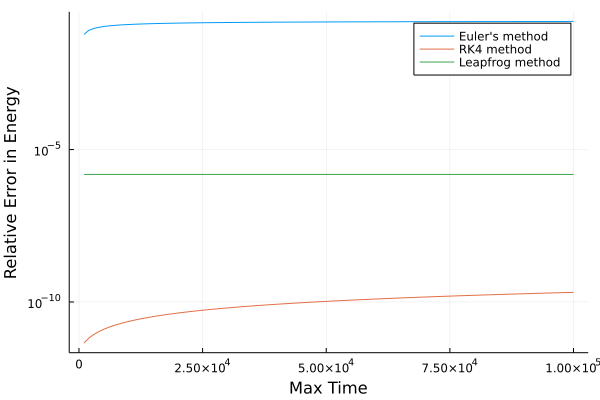

In [14]:
# This function may take a bit of time due to lots of tests taking place and the accuracy testing taking a long time.

function get_errors(max_times)
    methods = [eulers_method, ODE_solve_RK4, ODE_solve_leap_frog]
    h = 0.01
    initial_conditions = [0, 1, 1.5, 0]
    errors = zeros(Float64, (length(max_times), length(methods)))

    for (j, method) in enumerate(methods)
        state, _ = method(df_dt_one_body, 1:h:max_times[end], initial_conditions)
        for (i, max_time) in enumerate(max_times)
            errors[i, j] = energy_difference(state[:, 1:length(1:h:max_time)])
        end
    end
    return errors
end


max_times = 1000:1000:100000
plot(max_times, get_errors(max_times), labels=["Euler's method" "RK4 method" "Leapfrog method"], yaxis=:log10, xlabel="Max Time", ylabel="Relative Error in Energy")

We can see in the above figure that the RK4 method is by far the most accurate (note the log scale on the y-axis). However, we can see that the global error is increasing with time for this method. Whereas the leapfrog method is less accurate for the time-ranges tested, the error is seen to be approximately constant, namely, this method conserves energy. Thus, for long enough simulations, we can expect that there will be a point where the leapfrog method will become more accurate. The Euler's method was least accurate by far and the error increased with time, so it is the least accurate of all methods for all time ranges.

#### 16d:

Time for state of the art symplectic integrator:
  439.042 ms (7900020 allocations: 717.17 MiB)
Time for leapfrog (with same step size):
  58.680 ms (1699993 allocations: 131.22 MiB)
Time for leapfrog (with step size seen on graph):
  17.237 s (339996610 allocations: 25.63 GiB)


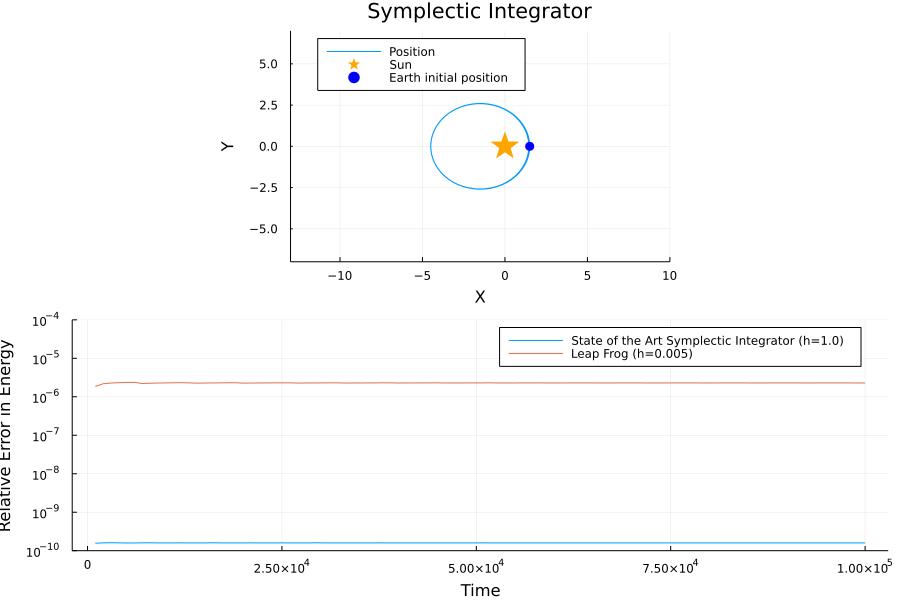

In [15]:
# May take some time (for the leapfrog implementation)

using DifferentialEquations
using Plots
using BenchmarkTools
max_time = 10^5
h = 1.0
h_leap_frog = 0.005


function one_body_acceleration!(dv, v, u, _, t)
    state = vcat(v, u)
    change = df_dt_one_body(state, t)
    dv[1] = change[1]
    dv[2] = change[2]
end


problem = SecondOrderODEProblem(one_body_acceleration!, [0.0, 1.0], [1.5, 0.0], (1.0, max_time))
solution = solve(problem, SofSpa10(), dt=h)

println("Time for state of the art symplectic integrator:")
@btime solve(problem, SofSpa10(), dt=h)
println("Time for leapfrog (with same step size):")
@btime ODE_solve_leap_frog(df_dt_one_body, 1:h:max_time, [0, 1, 1.5, 0])
println("Time for leapfrog (with step size seen on graph):")
@btime ODE_solve_leap_frog(df_dt_one_body, 1:h_leap_frog:max_time, [0, 1, 1.5, 0])

p1 = plot(solution, vars=(3, 4), label="Position", xlabel="X", ylabel="Y",
    title="Symplectic Integrator", aspectratio=1, legend=:topleft, ylim=(-7, 7), xlim=(-13, 10))
scatter!([0], [0], ms=15, msw=0, c=:orange, shape=:star, label="Sun")
scatter!([1.5], [0.0], ms=5, msw=0, c=:blue, shape=:circle, label="Earth initial position")

r = sqrt.(solution[3, :].^2 + solution[4, :].^2)
energy = 0.5*(solution[1, :].^2 + solution[2, :].^2) - 1.0./r
# SOTA is state of the art
energy_difference_SOTA = energy .- energy[begin]
energy_cummean = cumsum(energy_difference_SOTA) ./ (1:length(energy_difference_SOTA))
energy_relative_error = abs.(energy_cummean / energy[begin])


state_leap_frog, _ = ODE_solve_leap_frog(df_dt_one_body, 1:h_leap_frog:max_time, [0, 1, 1.5, 0])
r_leap_frog = sqrt.(state_leap_frog[3, :].^2 + state_leap_frog[4, :].^2)
energy_leap_frog = 0.5*(state_leap_frog[1, :].^2 + state_leap_frog[2, :].^2) - 1.0./r_leap_frog
energy_difference_lf = energy_leap_frog .- energy_leap_frog[begin]
energy_cummean_lf = cumsum(energy_difference_lf) ./ (1:length(energy_difference_lf))
energy_relative_error_lf = abs.(energy_cummean_lf / energy_leap_frog[begin])

plot_points = 1000:1000:max_time
p2 = plot(plot_points, energy_relative_error[plot_points], label="State of the Art Symplectic Integrator (h=$(h))", yaxis=:log10, ylim=(10^-10, 10^-4), ylabel="Relative Error in Energy", xlabel="Time")
plot!(plot_points, energy_relative_error_lf[plot_points], label="Leap Frog (h=$(h_leap_frog))")

plot(p1,p2,layout=(2,1), size=(900,600))

Both methods appear to conserve energy, however the leapfrog method does have slightly more variation. We can also see that the state of the art integration method is far more accurate, even despite having a step size over 200 times smaller than the leapfrog method! Comparing to the previous part of the question (above), we can even see that the state of the art integrator outperforms the RK4 method (again, with a step size 100 times larger). Hence, for systems where energy will be conserved, the package methods seem to be the best option.

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q17)

Amy Chan is a past UQ student, currently working under the Operations Research company “Polymathian”.  She completed her undergraduate degree in mathematics in 2019 and continued with her honours year in 2010 where she took particular interest in mathematical analysis. After this, she became a graduate fellow at the CSIRO in 2013 where she did image analysis for a broad range of domains (including agriculture and medicine) and then in 2018, completed her PHD looking at data from brain MRIs. She decided to work at Polymathian after realising from her PHD that academia was not for her.

Polymathian is an operations research company which seeks to optimise and find solutions for problems for clients through analysing data, mathematics, and software development. After reaching solutions, they then aim to automate these solutions through developing apps and software which can be sold to clients. Polymathian also works with clients to process and present data to assist in financial decisions. Dr Chan assists in evaluating data and interacting with clients, however, now she mainly enjoys developing software and programs. Her personal experiences in this role are predominantly positive other than her bad interactions with clients, with a particular enjoyment of the company hiking and climbing culture. 

Dr Chan discussed a few key tools which she or her company uses to complete their jobs. These included databases, IDES such as VSCode and Pycharm, websites such as git and programming languages such as python, R and C++. I have heard of mostly all of these as they have appeared in my university courses through my degree. I had not heard, however, of the specific operations research C++ libraries Gurobi and CPLEX, which provide solvers for optimisation problems. She revealed that mainly, what program or software she uses is situational, so I was quite shocked to discover that they also use Microsoft Excel despite many other great equivalent programs. 

In essence, it was relieving to be assured that I in fact have job prospects after my math degree and there were many tips that Dr Chan gave that I thought would be beneficial for me during my career. One of the main tips she stated was to not let a lack of domain knowledge stop me from trying. Through a career in statistics and data operations, you will likely encounter and apply for jobs in an unknown industry, however many employers look for math graduates due to their heightened logical thinking skill and less for niche knowledge obtained in university. As such, although a math graduate may not have knowledge in an industry, a majority of industry specific knowledge is taught on the job. 

During Dr Chans talk, I found lots of the modelling and data analytics very interesting, and I enjoyed hearing about the problem-solving aspects of her job. One matter that has been brought to my attention is the importance of knowing how to program well, even as just a math graduate. Lots of companies desire a streamlined solution to problems and data analytics involves processing and evaluating thousands of data points, which is only realistically done through programming. As problem solvers and math students, it is beneficial for us to improve our programming skills and understand the primary industry used tools. Overall, this seminar was very interesting and informative for our careers as math students.